In [ ]:
import sys
import mysql.connector
import xlsxwriter
import pandas as pd
import sys
import mysql.connector
import os
from dotenv import load_dotenv
load_dotenv()
#ESTE ARGUMENTO NO SE USA EN ESTE REPORTE, SERÁ 0 SIEMPRE UWU
id=str(sys.argv[1])
#configurar la conexion a la base de datos
DB_USERNAME = os.getenv('DB_USERNAME')
DB_DATABASE = os.getenv('DB_DATABASE')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_PORT = os.getenv('DB_PORT')
a_color='#354F84'
b_color='#91959E'
# Conectar a DB
cnx = mysql.connector.connect(user=DB_USERNAME,
                              password=DB_PASSWORD,
                              host='localhost',
                              port=DB_PORT,
                              database=DB_DATABASE,
                              use_pure=False)
#Seccion para traer informacion de la base
query = ('SELECT * from customers where id = 1')

# join para cobros
# cobros=pd.read_sql('Select cobros.* ,customers.customer,internal_orders.invoice, users.name from ((cobros inner join internal_orders on internal_orders.id = cobros.order_id) inner join customers on customers.id = internal_orders.customer_id )inner join users on cobros.capturo=users.id',cnx)


#traer datos de los pedidos
pedidos=pd.read_sql("""Select internal_orders.* ,customers.clave,customers.alias,
coins.exchange_sell, coins.coin, coins.symbol, coins.code
from ((
    internal_orders
    inner join customers on customers.id = internal_orders.customer_id )
    inner join coins on internal_orders.coin_id = coins.id) 
     """,cnx)
cobros=pd.read_sql("""select cobro_orders.*
                     from (((
                         cobro_orders 
    inner join cobros on cobros.id=cobro_orders.cobro_id)
    inner join internal_orders on internal_orders.id = cobros.order_id )
    inner join coins on internal_orders.coin_id = coins.id) """,cnx)
facturas=pd.read_sql("""select * 
                     from ((
                         factures
    inner join internal_orders on internal_orders.id = factures.order_id )
    inner join coins on internal_orders.coin_id = coins.id) """,cnx)
creditos=pd.read_sql("""select * 
                     from ((
                         credit_notes    inner join internal_orders on internal_orders.id = credit_notes.order_id )
    inner join coins on internal_orders.coin_id = coins.id) """,cnx)
marcas=pd.read_sql("""select * 
                     from marcas""",cnx)
objetivo=pd.read_sql("""select * 
                     from settings""",cnx)['objetivo_anual'].values[0]

print(cobros)
nordenes=len(pedidos)
df=pedidos[['date']]

tc=pd.read_sql('select * from coins where id=13 ',cnx)['exchange_sell'].values[0]
writer = pd.ExcelWriter('storage/report/fab_por_pedido1.xlsx', engine='xlsxwriter')
workbook = writer.book
##FORMATOS PARA EL TITULO------------------------------------------------------------------------------
rojo_l = workbook.add_format({
    'bold': 0,
    'border': 0,
    'align': 'center',
    'valign': 'vcenter',
    #'fg_color': 'yellow',
    'font_color': 'red',
    'font_size':16})
negro_s = workbook.add_format({
    'bold': 0,
    'border': 0,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':12})
negro_b = workbook.add_format({
    'bold': 2,
    'border': 0,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':13,
    
    'text_wrap': True,
    'num_format': 'dd/mm/yyyy'}) 
rojo_b = workbook.add_format({
    'bold': 2,
    'border': 0,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'red',
    'font_size':13})      

#FORMATOS PARA CABECERAS DE TABLA --------------------------------
header_format = workbook.add_format({
    'bold': True,
    'text_wrap': True,
    'valign': 'center',
    'fg_color': 'yellow',
    'border': 1,})

blue_header_format = workbook.add_format({
    'bold': True,
    'bg_color': a_color,
     'text_wrap': True,
    'valign': 'vcenter',
    'align': 'center',
    'border_color':'white',
    'font_color': 'white',
    'border': 1})
blue_header_format_bold = workbook.add_format({
    'bold': True,
    'bg_color': a_color,
    'text_wrap': True,
    'valign': 'vcenter',
    'align': 'center',
    'border_color':'white',
    'font_color': 'white',
    'border': 1,
    'num_format': '[$$-409]#,##0.00',
    'font_size':13})

blue_footer_format_bold = workbook.add_format({
    'bold': True,
    'bg_color': a_color,
    'text_wrap': True,
    'valign': 'top',
    'align': 'center',
    'border_color':'white',
    'font_color': 'white',
    'border': 1,
    'num_format': '[$$-409]#,##0.00',
    'font_size':11})
#FORMATOS PARA TABLAS PER CE------------------------------------

blue_content = workbook.add_format({
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    
    'border_color':a_color,
    'font_size':10,
    'num_format': '[$$-409]#,##0.00'})
blue_content_unit = workbook.add_format({
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    
    'border_color':a_color,
    'font_size':10,
    })


blue_content_dll = workbook.add_format({
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'bg_color': '#b4e3b1',
    'border_color':a_color,
    'font_size':10,
    'num_format': '[$$-409]#,##0.00'})

blue_content_bold = workbook.add_format({
    'bold': True,
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':11,
    'border_color':a_color,
    # 'num_format': '[$$-409]#,##0.00'
    })

blue_content_bold_dll = workbook.add_format({
    'bold': True,
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':11,
    'bg_color': '#b4e3b1',
    'border_color':a_color,
    'num_format': '[$$-409]#,##0.00'})
blue_content_footer_dll = workbook.add_format({
    'bold': True,
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'white',
    'font_size':11,
    'bg_color': '#356e31',
    'border_color':'white',
    'num_format': '[$$-409]#,##0.00'})
blue_content_footer = workbook.add_format({
    'bold': True,
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'white',
    'font_size':11,
    'bg_color': '#3e5585',
    'border_color':'white',
    'num_format': '[$$-409]#,##0.00'})
blue_content_date = workbook.add_format({
    'border': 1,
    'align': 'center',
    'valign': 'vcenter',
    'font_color': 'black',
    'font_size':9,
    'border_color':a_color,
    'num_format': 'dd/mm/yyyy'})
#FOOTER FORMATS---------------------------------------------------------
observaciones_format = workbook.add_format({
    'bold': True,
    'text_wrap': True,
    'valign': 'top',
    'fg_color':'#BDD7EE',
    'border': 1})

total_cereza_format = workbook.add_format({
    'bold': True,
    'text_wrap': True,
    'valign': 'top',
    'fg_color':'#F4B084',
    'border': 1})


import datetime

currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
year = date.strftime("%Y")
dias_transcurridos=date-datetime.date(int(year), 1, 1)
#Columna para filtrar por fechas
pedidos['date']=pd.to_datetime(pedidos['date'])
pedidos=pedidos.loc[pedidos['date']>year+'-01-01']
df[0:1].to_excel(writer, sheet_name='Sheet1', startrow=7,startcol=6, header=False, index=False)
worksheet = writer.sheets['Sheet1']
#Encabezado del documento--------------
worksheet.merge_range('B2:F2', 'CUENTAS POR COBRAR REPORTE 1/8', negro_b)
worksheet.merge_range('B3:F3', 'OBJETIVOS Y RESULTADOS POR PEDIDO', negro_s)

worksheet.write('H2', 'AÑO', negro_b)
worksheet.write('I2', year, negro_b)
worksheet.merge_range('J2:K3', """FECHA DEL REPORTE
DD/MM/AAAA""", negro_b)
worksheet.merge_range('L2:L3', date, negro_b)
worksheet.insert_image("A1", "img/logo/logo.png",{"x_scale": 0.6, "y_scale": 0.6})

worksheet.write('B6', 'VENDEDOR', blue_header_format)
worksheet.write('C6', 'ENERO', blue_header_format)
worksheet.write('D6', 'FEBRERO', blue_header_format)
worksheet.write('E6', 'MARZO', blue_header_format)
worksheet.write('F6', 'ABRIL', blue_header_format)
worksheet.write('G6', 'MAYO', blue_header_format)
worksheet.write('H6', 'JUNIO', blue_header_format)
worksheet.write('I6', 'JULIO', blue_header_format)
worksheet.write('J6', 'AGOSTO', blue_header_format)
worksheet.write('K6', 'SEPTIEMBRE', blue_header_format)
worksheet.write('L6', 'OCTUBRE', blue_header_format)
worksheet.write('M6', 'NOVIEMBRE', blue_header_format)
worksheet.write('N6', 'DICIEMBRE', blue_header_format)

worksheet.write('O6', 'TOTAL', blue_header_format)

worksheet.write('P6', 'PORCENTAJE', blue_header_format)

for i in range(len(vendedores)):
    seller_id=vendedores['id'].values[i]
    pxv=pedidos.loc[pedidos['seller_id']==seller_id] 
    worksheet.write('B'+str(7+i), vendedores['seller_name'].values[i], blue_content)
    for mes in range(12):
        li=year+'-'+str(mes+1)+'-01'
        ls=year+'-'+str(mes+2)+'-01'
        if(mes+1==12):
            ls=str(int(year)+1)+'-01-01'
        worksheet.write(6+i,mes+2, len(pxv.loc[(pxv['date']<ls)&(pxv['date']>=li)]), blue_content_unit)
    worksheet.write('O'+str(7+i), len(pxv), blue_content_unit)
    worksheet.write('P'+str(7+i), str(round((len(pxv)*100)/len(pedidos),2))+'%', blue_content)
     
worksheet.write('B'+str(len(vendedores)+8), 'Total Mensual', blue_header_format)
for i in ['C','D','E','F','G','H','I','J','K','L','M','N','O']:

    worksheet.write_formula(i+str(len(vendedores)+8),  '{=SUM('+i+'7:'+i+str(len(vendedores)+6)+')}',blue_content_bold)
worksheet.write('P'+str(len(vendedores)+8),  '100%',blue_content_bold)




worksheet.write('B'+str(len(vendedores)+10), 'Objetivo Anual', blue_header_format)
worksheet.write('C'+str(len(vendedores)+10), str(objetivo), blue_content_bold)

worksheet.write('B'+str(len(vendedores)+11), 'Dias transcurridos', blue_header_format)
worksheet.write('C'+str(len(vendedores)+11), str(dias_transcurridos.days), blue_content_bold)

worksheet.write('B'+str(len(vendedores)+12), 'Objetivo a la fecha', blue_header_format)
worksheet.write('C'+str(len(vendedores)+12), str(len(pedidos)), blue_content_bold)

worksheet.write('B'+str(len(vendedores)+13), 'Porcentaje completado', blue_header_format)
worksheet.write('C'+str(len(vendedores)+13), str(round(len(pedidos)*100/objetivo,2))+'%', blue_content_bold)
#Grafica
# chart = workbook.add_chart({'type': 'column'})

# # Configure the chart. In simplest case we add one or more data series.
# chart.add_series({ 'name':'Enero','categories': '=Sheet1!$B$7:$B$'+str(6+len(vendedores)),'values': '=Sheet1!$C$7:$C$'+str(6+len(vendedores))})
# chart.add_series({'name':'Febrero', 'categories': '=Sheet1!$B$7:$B$'+str(6+len(vendedores)),'values': '=Sheet1!$D$7:$D$'+str(6+len(vendedores))})
# chart.add_series({ 'name':'Marzo','categories': '=Sheet1!$B$7:$B$'+str(6+len(vendedores)),'values': '=Sheet1!$E$7:$E$'+str(6+len(vendedores))})
# #insertar grafica
# worksheet.insert_chart('P7', chart,{'x_scale': 2, 'y_scale': 0.75})
#AGRANDAR CPLUMNAS
worksheet.set_column('A:A',15)
worksheet.set_column('B:B',35)
worksheet.set_column('E:O',18)
worksheet.set_column('P:T',15)

#worksheet.set_landscape()
worksheet.set_paper(9)
worksheet.fit_to_pages(1, 1)  
worksheet.set_landscape() 

worksheet_charts = workbook.add_worksheet("Gráficas")
worksheet_charts.merge_range('B2:F2', 'CUENTAS POR COBRAR REPORTE 1/8', negro_b)
worksheet_charts.merge_range('B3:F3', 'OBJETIVOS Y RESULTADOS POR PEDIDO', negro_s)

worksheet_charts.write('H2', 'AÑO', negro_b)
worksheet_charts.write('I2', year, negro_b)
worksheet_charts.merge_range('J2:K3', """FECHA DEL REPORTE
DD/MM/AAAA""", negro_b)
worksheet_charts.merge_range('L2:L3', date, negro_b)
worksheet_charts.insert_image("A1", "img/logo/logo.png",{"x_scale": 0.6, "y_scale": 0.6})

# Create a new chart object.
chart = workbook.add_chart({'type': 'pie'})

# Add a series to the chart.
chart.add_series({'values': '=Sheet1!$O$7:$O$'+str(7+ len(vendedores)),
                  'categories': '=Sheet1!$B$7:$B$'+str(7+ len(vendedores))})

# Add a series to the chart.
chart.add_series({'values': '=Sheet1!$O$7:$O$'+str(7+ len(vendedores)),
                  'categories': '=Sheet1!$B$7:$B$'+str(7+ len(vendedores)),
                  'percentage': True,
                    'leader_lines': True,
                    'position': 'best_fit',
                    'data_labels': {
                    'value': True,
                    'font': {'color': 'gray','size': 10}
                }
                  })

# Insert the chart into the worksheet.
worksheet_charts.insert_chart('B5', chart,{'x_scale': 2.15, 'y_scale': 1.35})


# Create a new chart object.
chart = workbook.add_chart({'type': 'line'})

for i in range(len(vendedores)):
    seller_id=vendedores['id'].values[i]
    pxv=pedidos.loc[pedidos['seller_id']==seller_id] 
# Add a series to the chart.
    if(len(pxv)>len(pedidos)*0.05):
        
        chart.add_series({'values': '=Sheet1!$C$'+str(7+i)+':$N$'+str(7+i),
                  'categories': '=Sheet1!$C$6:$N$6',
                  'name':'=Sheet1!$B'+str(7+i)})


chart.add_series({'values': '=Sheet1!$C$'+str(8+len(vendedores))+':$N$'+str(8+len(vendedores)),
                  'categories': '=Sheet1!$C$6:$N$6',
                  'name':'TOTAL',
                  })

# Insert the chart into the worksheet.
worksheet_charts.insert_chart('B25', chart,{'x_scale': 2.15, 'y_scale': 1.35})

worksheet_charts.set_column('B:C',20)
worksheet_charts.set_column('L:L',20)

#worksheet.set_landscape()
worksheet_charts.set_paper(9)
worksheet_charts.fit_to_pages(1, 1)  

workbook.close()

C:\Users\hp\AppData\Local\Temp\ipykernel_13608\3462009504.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  clientes=pd.read_sql("""select  * from customers """,cnx)
C:\Users\hp\AppData\Local\Temp\ipykernel_13608\3462009504.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bancos=pd.read_sql("""select  * from banks """,cnx)
C:\Users\hp\AppData\Local\Temp\ipykernel_13608\3462009504.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pedidos=pd.read_sql("""Select internal_orders.* ,customers.clave,customers.alias,
C:\U

cobro 0
cobro 1
cobro 2
cobro 3
cobro 4
cobro 5
cobro 6
cobro 7
cobro 8
cobro 9
cobro 10
cobro 11
cobro 12
cobro 13
cobro 14
cobro 15
cobro 16
cobro 17
cobro 18
cobro 19
cobro 20
cobro 21
cobro 22
cobro 23
cobro 24
cobro 25
cobro 26
cobro 27
cobro 28
cobro 29
cobro 30
cobro 31
cobro 32
cobro 33
cobro 34
cobro 35
cobro 36
cobro 37
cobro 38
cobro 39
cobro 40
cobro 41
cobro 42
cobro 43
cobro 44
cobro 45
cobro 46
cobro 47
cobro 48
cobro 49
cobro 50
cobro 51
cobro 52
cobro 53
cobro 54
cobro 55
cobro 56
cobro 57
cobro 58
cobro 59
cobro 60
cobro 61
cobro 62
cobro 63
cobro 64
cobro 65
cobro 66
cobro 67
cobro 68
cobro 69
cobro 70
cobro 71
cobro 72
cobro 73
cobro 74
cobro 75
cobro 76
cobro 77
cobro 78
cobro 79
cobro 80
cobro 81
cobro 82
cobro 83
cobro 84
cobro 85
cobro 86
cobro 87
cobro 88
cobro 89
cobro 90
cobro 91
cobro 92
cobro 93
cobro 94
cobro 95
cobro 96
cobro 97
cobro 98
cobro 99
cobro 100
cobro 101
cobro 102
cobro 103
cobro 104
cobro 105
cobro 106
cobro 107
cobro 108
cobro 109
cobro 110


In [30]:
facturas

,id,order_id,ordinal,facture,amount,status,npagos,created_at,updated_at,date,...,id,coin,symbol,code,exchange_rate,date_application,created_at,updated_at,exchange_buy,exchange_sell
0,6,116,1,A 2549,150000.0,CAPTURA,None,2023-04-26,2023-04-26,2023-04-26,...,1,NACIONAL,$,MN,None,2023-03-09,2023-03-09 17:01:26,2023-03-09 17:01:26,1.0,1.0
1,7,116,2,A 2929,20000.0,CAPTURA,None,2023-04-26,2023-04-26,2023-04-26,...,1,NACIONAL,$,MN,None,2023-03-09,2023-03-09 17:01:26,2023-03-09 17:01:26,1.0,1.0
2,8,116,3,A 2949,20000.0,CAPTURA,None,2023-04-26,2023-04-26,2023-04-26,...,1,NACIONAL,$,MN,None,2023-03-09,2023-03-09 17:01:26,2023-03-09 17:01:26,1.0,1.0
3,9,116,3,A 2981,23200.0,CAPTURA,None,2023-04-26,2023-04-26,2023-04-26,...,1,NACIONAL,$,MN,None,2023-03-09,2023-03-09 17:01:26,2023-03-09 17:01:26,1.0,1.0
4,10,116,3,A 3007,23200.0,CAPTURA,None,2023-04-26,2023-04-26,2023-04-26,...,1,NACIONAL,$,MN,None,2023-03-09,2023-03-09 17:01:26,2023-03-09 17:01:26,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,537,422,1,A 3824,141520.0,CAPTURA,None,2024-03-07,2024-03-07,2024-03-06,...,1,NACIONAL,$,MN,None,2023-03-09,2023-03-09 17:01:26,2023-03-09 17:01:26,1.0,1.0
631,89,133,1,A 3148,65907.7,CAPTURA,None,2023-05-23,2023-05-23,2022-05-20,...,1,NACIONAL,$,MN,None,2023-03-09,2023-03-09 17:01:26,2023-03-09 17:01:26,1.0,1.0
632,160,141,1,A 3243,795600.0,CAPTURA,None,2023-06-07,2023-06-07,2022-09-06,...,1,NACIONAL,$,MN,None,2023-03-09,2023-03-09 17:01:26,2023-03-09 17:01:26,1.0,1.0
633,164,144,1,A 3253,921968.0,CAPTURA,None,2023-06-07,2023-06-07,2022-09-14,...,1,NACIONAL,$,MN,None,2023-03-09,2023-03-09 17:01:26,2023-03-09 17:01:26,1.0,1.0


In [27]:
cobros

,cobro_id,order_id,id,created_at,updated_at,amount,comp,date,bank_id,customer_id,invoice
0,21,116,4,None,None,150000.00,1066,2020-02-24,2,506,2175
1,22,116,5,None,None,20000.00,1472,2021-08-16,2,506,2175
2,23,116,6,None,None,20000.00,1492,2021-09-17,2,506,2175
3,24,116,7,None,None,23200.00,1526,2021-11-12,2,506,2175
4,25,116,8,None,None,23200.00,1552,2021-12-23,2,506,2175
...,...,...,...,...,...,...,...,...,...,...,...
612,671,337,661,2024-04-26,2024-04-26,451008.00,2363,2024-04-26,2,415,3108
613,672,364,662,2024-04-26,2024-04-26,3184.20,2364,2024-04-26,2,415,3132
614,673,471,663,2024-04-26,2024-04-26,3188210.70,2365,2024-04-26,2,690,3209
615,674,448,664,2024-04-26,2024-04-26,93493.68,2366,2024-04-26,2,684,3197


In [14]:
bancos

,id,bank_clue,coin,bank_description,bank_account,created_at,updated_at
0,1,BXMN,NACIONAL,BANAMEX,,None,None
1,2,BTMN,NACIONAL,BANORTE,,None,None
2,3,BJMN,NACIONAL,BAJIO,,None,None
3,4,STMN,NACIONAL,SANTANDER,,None,None
4,5,BXDL,DOLARES AMERICANOS,BANAMEX,,None,None
5,6,BTDL,DOLARES AMERICANOS,BANORTE,,None,None
6,7,BJDL,DOLARES AMERICANOS,BAJIO,,None,None
7,8,STDL,DOLARES AMERICANOS,SANTANDER,,None,None
8,9,NCMN,NACIONAL,NOTA DE CREDITO,,None,None
9,10,NCDL,DOLAR AMERICANO,NOTA DE CREDITO,,None,None


In [29]:
print(items.family.unique())

['RACKS' 'VIGAS' 'TRANSPORTADORES' 'MARCO' 'TRAVESAÑO' 'ENTREPAÑOS'
 'RESPALDO' 'MDF' 'PROTECTORES' 'INSTALACION' 'RAMPAS NIVELADORAS'
 'CALZAS' 'vigas' 'PANEL GALVANIZADO' 'MALLA']


In [41]:
items.groupby(['family'])['family'].count().sort_values( ascending=[False]).index

Index(['RACKS', 'TRANSPORTADORES', 'MARCO', 'VIGAS', 'CALZAS', 'PROTECTORES',
       'ENTREPAÑOS', 'INSTALACION', 'MALLA', 'MDF', 'PANEL GALVANIZADO',
       'RAMPAS NIVELADORAS', 'RESPALDO', 'TRAVESAÑO', 'vigas'],
      dtype='object', name='family')

In [ ]:
items.sort_values(by=)

,internal_order_id,invoice,date,customer_id,seller_id,date_delivery,instalation_date,shipment,customer_shipping_address_id,coin_id,...,ieps,descuento,ncotizacion,otra,dgi,noha,ret,tasa,description,category
235,383,3150,2024-01-05,670,15,2024-02-09,2024-02-09,Sí,271,1,...,0.0,0.00,14801,0.0,0.0,1,NaN,0.0,PF+SI,Integracion
236,385,3151,2024-01-10,424,2,2024-01-17,2024-01-17,No,29,1,...,0.0,0.00,14829,0.0,0.0,2,NaN,0.0,Servicio indirecto SI,Servicios
237,390,3152,2024-01-19,317,14,2024-02-28,2024-03-06,Sí,273,1,...,0.0,0.00,13473-R1,0.0,0.0,3,NaN,0.0,PF+SI,Integracion
238,391,3153,2024-01-19,671,2,2024-03-01,2024-03-08,Sí,274,1,...,0.0,0.00,14839,0.0,0.0,4,NaN,0.0,PF+SI,Integracion
239,392,3154,2024-01-25,672,14,2024-03-19,2024-03-26,Sí,276,1,...,0.0,0.00,14564,0.0,0.0,5,NaN,0.0,PF+SI,Integracion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,470,3208,2024-04-19,689,20,2024-06-14,2024-06-14,Sí,314,1,...,0.0,0.07,15036 R2 15037,0.0,0.0,59,NaN,0.0,PF+SI,Integracion
294,471,3209,2024-04-26,690,29,2024-07-30,2024-07-30,Sí,316,1,...,0.0,0.00,15009 R2,0.0,0.0,60,NaN,0.0,PF+SD,Integracion
295,472,3210,2024-04-29,638,21,2024-04-30,2024-04-30,Sí,191,1,...,0.0,0.00,15106,0.0,0.0,61,NaN,0.0,Servicio directo SD,Servicios
296,473,3211,2024-04-30,691,14,2024-07-08,2024-07-08,Sí,317,1,...,0.0,0.00,15098,0.0,0.0,62,NaN,0.0,PF+SD,Integracion


In [5]:
vendedores.loc[vendedores['id'].isin(socios_ids['seller_id'].unique())]

,id,seller_name,seller_mobile,seller_office_phone,seller_office_phone_ext,seller_email,seller_state,seller_city,seller_suburb,seller_street,...,created_at,updated_at,ga,gc,gv,firma,status,iniciales,folio,dgi
0,1,GUTIERREZ\tABADIA\tALEJANDRO,5573456790,5573456790,None,abadia@tyrsa.com.mx,None,None,None,None,...,2023-03-09 14:56:29,2023-03-09 14:56:29,1,1,1,GVRaga,ACTIVO,GAA,1,0.04
13,15,PAREDES\tTORRES\tGUILLERMO,5555555555,5555555555,None,gparedes@tyrsa.com.mx,None,None,None,None,...,2023-03-09 16:01:19,2023-03-09 16:01:19,1,1,1,V15gpt,ACTIVO,PTG,15,0.00
3,5,HERREÑO\tCORRALES\tFREDY ALEXANDER,5555555555,5555555555,None,alexh@tyrsa.com.mx,None,None,None,None,...,2023-03-09 15:52:34,2023-03-09 15:52:34,1,1,1,GVTfhc,ACTIVO,HCFA,5,0.00
2,4,HERREÑO\tCORRALES\tCHRISTIAN LEONARDO,5555555555,5555555555,None,leonardo@tyrsa.com.mx,None,None,None,None,...,2023-03-09 15:43:54,2023-03-09 15:43:54,1,1,1,DAchc,ACTIVO,HCCL,4,0.00
1,2,HERREÑO\tCORRALES\tNELSON ANDRES,5555555555,5555555555,None,andreshc@tyrsa.com.mx,None,None,None,None,...,2023-03-09 15:50:30,2023-03-09 15:50:30,1,1,1,DCahc,ACTIVO,HCNA,2,0.04
7,9,ROMO\tRAMIREZ\tHADRIEL,5555555555,5555555555,None,hromo@tyrsa.com.mx,None,None,None,None,...,2023-03-09 15:56:55,2023-03-09 15:56:55,1,1,1,V9hrr,INACTIVO,RRH,9,0.00
4,6,WUNSCH\tCERON\tJAIR,5555555555,5555555555,None,jwunsch@tyrsa.com.mx,None,None,None,None,...,2023-03-09 15:53:47,2023-03-09 15:53:47,1,1,1,V6jwc,INACTIVO,WCJ,6,0.00
9,11,ROMERO\tZAVALA\tMIGUEL ERNESTO,5555555555,5555555555,None,mromero@tyrsa.com.mx,None,None,None,None,...,2023-03-09 15:58:26,2023-03-09 15:58:26,1,1,1,V11mrz,INACTIVO,RZME,11,0.00


In [5]:
pedidos

,internal_order_id,invoice,date,customer_id,seller_id,date_delivery,instalation_date,shipment,customer_shipping_address_id,coin_id,...,ieps,descuento,ncotizacion,otra,dgi,noha,ret,tasa,description,category
235,383,3150,2024-01-05,670,15,2024-02-09,2024-02-09,Sí,271,1,...,0.0,0.00,14801,0.0,0.0,1,NaN,0.0,PF+SI,Integracion
236,385,3151,2024-01-10,424,2,2024-01-17,2024-01-17,No,29,1,...,0.0,0.00,14829,0.0,0.0,2,NaN,0.0,Servicio indirecto SI,Servicios
237,390,3152,2024-01-19,317,14,2024-02-28,2024-03-06,Sí,273,1,...,0.0,0.00,13473-R1,0.0,0.0,3,NaN,0.0,PF+SI,Integracion
238,391,3153,2024-01-19,671,2,2024-03-01,2024-03-08,Sí,274,1,...,0.0,0.00,14839,0.0,0.0,4,NaN,0.0,PF+SI,Integracion
239,392,3154,2024-01-25,672,14,2024-03-19,2024-03-26,Sí,276,1,...,0.0,0.00,14564,0.0,0.0,5,NaN,0.0,PF+SI,Integracion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,470,3208,2024-04-19,689,20,2024-06-14,2024-06-14,Sí,314,1,...,0.0,0.07,15036 R2 15037,0.0,0.0,59,NaN,0.0,PF+SI,Integracion
294,471,3209,2024-04-26,690,29,2024-07-30,2024-07-30,Sí,316,1,...,0.0,0.00,15009 R2,0.0,0.0,60,NaN,0.0,PF+SD,Integracion
295,472,3210,2024-04-29,638,21,2024-04-30,2024-04-30,Sí,191,1,...,0.0,0.00,15106,0.0,0.0,61,NaN,0.0,Servicio directo SD,Servicios
296,473,3211,2024-04-30,691,14,2024-07-08,2024-07-08,Sí,317,1,...,0.0,0.00,15098,0.0,0.0,62,NaN,0.0,PF+SD,Integracion


In [7]:
pedidos_interes=pedidos_interes.assign(exceso=lambda x: x.saldo -x.total )

In [23]:
pxv['date']=pd.to_datetime(pxv['date'])
worksheet.write(7+i,mes+1, len(pxv.loc[(pxv['date']<str(year)+'-'+str(mes+2)+'-01')&(pxv['date']>=str(year)+'-'+str(mes+2)+'-01')]), blue_content)

C:\Users\fgonzalez\AppData\Local\Temp\ipykernel_24124\2599723469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pxv['date']=pd.to_datetime(pxv['date'])


0

In [22]:
len(pxv.loc[(pxv['date']<str(year)+'-'+str(mes+2)+'-01')&(pxv['date']>=str(year)+'-'+str(mes+2)+'-01')])

0

In [ ]:
for i in range(len(vendedores)):
    seller_id=vendedores['id'].values[i]
    pxv=pedidos.loc[pedidos['seller_id']==seller_id]
    pedidos.loc[(pedidos['date']<year+'-02-01')&(pedidos['date']>=year+'-01-01')]
    print(len(pxv))

3
64
0
30
0
0
9
0
1
0
5
2
64
20
8
9
2
17
30
27
1
0
1


In [5]:
len(pedidos)

298

In [14]:
year

'2024'

In [12]:
pedidos['date']=pd.to_datetime(pedidos['date'])

In [16]:
pedidos.loc[(pedidos['date']<year+'-02-01')&(pedidos['date']>=year+'-01-01')]

,id,invoice,date,customer_id,seller_id,date_delivery,instalation_date,shipment,customer_shipping_address_id,coin_id,...,ret,tasa,description,category,clave,alias,exchange_sell,coin,symbol,code
235,383,3150,2024-01-05,670,15,2024-02-09,2024-02-09,Sí,271,1,...,NaN,0.0,PF+SI,Integracion,375,COMERCIALIZADORA PANJUM,1.0,NACIONAL,$,MN
236,385,3151,2024-01-10,424,2,2024-01-17,2024-01-17,No,29,1,...,NaN,0.0,Servicio indirecto SI,Servicios,18,SKYTEX,1.0,NACIONAL,$,MN
237,390,3152,2024-01-19,317,14,2024-02-28,2024-03-06,Sí,273,1,...,NaN,0.0,PF+SI,Integracion,219,NARECI,1.0,NACIONAL,$,MN
238,391,3153,2024-01-19,671,2,2024-03-01,2024-03-08,Sí,274,1,...,NaN,0.0,PF+SI,Integracion,376,RAMONETTISA,1.0,NACIONAL,$,MN
239,392,3154,2024-01-25,672,14,2024-03-19,2024-03-26,Sí,276,1,...,NaN,0.0,PF+SI,Integracion,362,INDUSTRIAS UNIDAS,1.0,NACIONAL,$,MN
240,393,3155,2024-01-25,672,14,2024-03-26,2024-04-02,Sí,277,1,...,NaN,0.0,PF+SI,Integracion,362,INDUSTRIAS UNIDAS,1.0,NACIONAL,$,MN
241,394,3156,2024-01-25,672,14,2024-04-02,2024-04-02,Sí,278,1,...,NaN,0.0,PF+SI,Integracion,362,INDUSTRIAS UNIDAS,1.0,NACIONAL,$,MN
242,395,3157,2024-01-25,673,20,2024-03-11,2024-03-18,Sí,279,1,...,NaN,0.0,PF+SI,Integracion,377,SOLUCIONES EN ARRENDAMIENTO,1.0,NACIONAL,$,MN
243,396,3158,2024-01-26,621,5,2024-03-21,2024-03-11,Sí,280,1,...,NaN,0.0,PF+SI,Integracion,329,LIDERSOL,1.0,NACIONAL,$,MN
244,397,3159,2024-01-26,659,5,2024-03-21,2024-03-10,Sí,248,1,...,NaN,0.0,PF+SI,Integracion,363,BEE BAGS,1.0,NACIONAL,$,MN


In [8]:
pedidos['date']

0      2023-04-04
1      2023-04-04
2      2023-04-09
3      2023-04-09
4      2023-04-10
          ...    
293    2024-04-19
294    2024-04-26
295    2024-04-29
296    2024-04-30
297    2024-05-06
Name: date, Length: 298, dtype: object

In [1]:
4*1.6

6.4

In [1]:
8/19

0.42105263157894735

In [115]:
import math
t=np.arange(0,5,0.25)
#angulod e inclinacion 45g
theta=math.pi/2
#vlociodad inicial 
v0=2#m/s
g=.98


In [116]:
x=t*v0*math.cos(theta)
y=x*math.tan(theta)-((g*x*x)/(2*v0*v0*math.cos(theta)*math.cos(theta)))+0.6

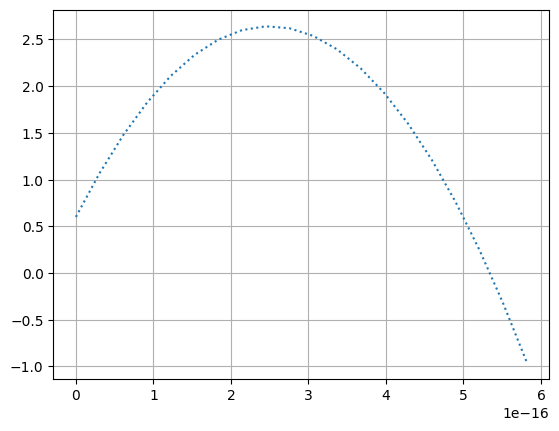

In [117]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(x,y, linestyle = 'dotted')
plt.grid()
plt.show()

7.5